<a href="https://colab.research.google.com/github/Sankalp-2820/Regional-Flood-Frequency-Analysis/blob/main/CE6670_Project_Miscellaneous_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Miscellaneous - 3. This part contains the trials of fitting different distributions to streamflows**

# CE6670 Course Project

In [2]:
import numpy as np
import pandas as pd

# Mounting Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading Data from CSV File

In [4]:
path = '/content/drive/MyDrive/Camels Aus Data/Streamflow Time series/03_streamflow/streamflow_MLd.csv'
df = pd.read_csv(path)
df.head()

,year,month,day,912101A,912105A,915011A,917107A,919003A,919201A,919309A,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
0,1951,1,1,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,-99.99,-99.99,92.6120,-99.99,-99.99,-99.99,213.759
1,1951,1,2,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,-99.99,-99.99,87.6400,-99.99,-99.99,-99.99,144.897
2,1951,1,3,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,-99.99,-99.99,79.5119,-99.99,-99.99,-99.99,128.456
3,1951,1,4,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,-99.99,-99.99,82.7683,-99.99,-99.99,-99.99,117.354
4,1951,1,5,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,-99.99,-99.99,89.2553,-99.99,-99.99,-99.99,115.843


In [5]:
df.shape

(23376, 225)

# Extraction of Annual Maximum values of Streamflows for all the stations

In [6]:
AMS = df.groupby(['year']).max()

In [7]:
AMS.head()

,month,day,912101A,912105A,915011A,917107A,919003A,919201A,919309A,922101B,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
year,,,,,,,,,,,,,,,,,,,,,
1951,12,31,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,-99.99,-99.99,1739.73,-99.99,-99.99,-99.99,5680.29
1952,12,31,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,-99.99,-99.99,4638.20,-99.99,-99.99,-99.99,8961.76
1953,12,31,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,43627.30,-99.99,2828.89,-99.99,-99.99,-99.99,3275.36
1954,12,31,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,52593.50,-99.99,2266.80,-99.99,-99.99,-99.99,6505.59
1955,12,31,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99,...,-99.99,-99.99,-99.99,36368.90,-99.99,3336.16,-99.99,-99.99,-99.99,4294.40


In [8]:
AMS.shape

(64, 224)

# Extracting the Stations Ids from the column names

In [9]:
column_names_array = AMS.columns[2:].tolist()
n_stations = len(column_names_array)

# Replacing the Missing values with NaN

In [10]:
AMS.replace(-99.99, np.nan, inplace=True)
AMS.head()

,month,day,912101A,912105A,915011A,917107A,919003A,919201A,919309A,922101B,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
year,,,,,,,,,,,,,,,,,,,,,
1951,12,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1739.73,NaN,NaN,NaN,5680.29
1952,12,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4638.20,NaN,NaN,NaN,8961.76
1953,12,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,43627.3,NaN,2828.89,NaN,NaN,NaN,3275.36
1954,12,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,52593.5,NaN,2266.80,NaN,NaN,NaN,6505.59
1955,12,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,36368.9,NaN,3336.16,NaN,NaN,NaN,4294.40


# Calculating the Percentage of NaN values for different Time Periods

In [11]:
import pandas as pd

percent = [10,20,30,40,50]
percent_of_stations = []
percent_nans_for_timeP = []
years = [4,14,24,34,44]

for y in years:
  nan_percent = AMS.iloc[y:,2:].isnull().mean() * 100
  for p in percent:
    stations_with_over_p_percent_nan = nan_percent[nan_percent > p]
    percent_of_stations.append(len(stations_with_over_p_percent_nan)/222*100)
  percent_nans_for_timeP.append(percent_of_stations)
  percent_of_stations = []


df = pd.DataFrame(percent_nans_for_timeP, columns=percent, index=years)
new_row_names = [60,50,40,30,20]
df.index = new_row_names
df = df.round(1)
print("The percentage NaN values for different time periods are as follows:")
df

The percentage NaN values for different time periods are as follows:


,10,20,30,40,50
60,75.2,55.0,18.9,2.7,0.0
50,35.6,9.0,2.3,0.0,0.0
40,4.5,1.4,0.5,0.0,0.0
30,5.0,2.3,0.9,0.5,0.0
20,5.4,2.7,2.3,0.9,0.5


### Observation: **For a 40 year period of 1975-2014, there are 4.5% stations which have more than 10% missing values. So we choose that period for our analysis**

# Slicing the AMS dataframe for the data of 40 years and Filling the missing values

In [12]:
AMS_without_null = AMS.iloc[24:,2:]

### NOTE: **Using KNNImputer from sklearn to fill the missing values for all the stations**

In [13]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=20)
AMS_without_null= impute_knn.fit_transform(AMS_without_null)
AMS_without_null = pd.DataFrame(AMS_without_null)

In [14]:
AMS_without_null.head()

,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,217,218,219,220,221
0,171886.0,155415.0,7152.28,4593.730,41029.4,15118.7,61467.6,12158.90,68813.3,8308.47,...,9133.10,945.837,46784.5,60695.3,11997.6950,3905.36,17631.30,7641.13,27528.40,5963.62
1,129123.0,103335.0,5458.88,7039.570,100524.0,28825.5,48150.7,16103.40,69402.3,9636.01,...,1960.57,471.294,34607.9,49011.4,12489.0080,2391.66,8264.41,6281.46,12217.50,2382.45
2,147734.0,181327.0,2956.08,1644.130,240838.0,17783.6,157666.0,5208.97,59452.4,3176.85,...,2093.82,428.928,24366.5,29105.0,12661.2190,1314.88,9453.75,5398.26,9590.17,3631.31
3,25466.6,32386.1,483.45,894.971,42760.2,13798.0,30212.5,6511.00,24546.0,5668.98,...,1383.43,344.774,38106.5,24839.0,11763.5270,1177.38,9292.47,6505.36,7827.53,3956.38
4,82042.5,88730.2,5490.52,13232.100,643762.0,49980.1,129877.0,37568.30,84142.8,18203.50,...,1815.78,128.848,34444.5,32994.7,12692.0215,1553.18,15041.90,8523.38,9892.23,3149.38


In [15]:
AMS_without_null.columns = column_names_array
AMS_without_null.head()

,912101A,912105A,915011A,917107A,919003A,919201A,919309A,922101B,925001A,926002A,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
0,171886.0,155415.0,7152.28,4593.730,41029.4,15118.7,61467.6,12158.90,68813.3,8308.47,...,9133.10,945.837,46784.5,60695.3,11997.6950,3905.36,17631.30,7641.13,27528.40,5963.62
1,129123.0,103335.0,5458.88,7039.570,100524.0,28825.5,48150.7,16103.40,69402.3,9636.01,...,1960.57,471.294,34607.9,49011.4,12489.0080,2391.66,8264.41,6281.46,12217.50,2382.45
2,147734.0,181327.0,2956.08,1644.130,240838.0,17783.6,157666.0,5208.97,59452.4,3176.85,...,2093.82,428.928,24366.5,29105.0,12661.2190,1314.88,9453.75,5398.26,9590.17,3631.31
3,25466.6,32386.1,483.45,894.971,42760.2,13798.0,30212.5,6511.00,24546.0,5668.98,...,1383.43,344.774,38106.5,24839.0,11763.5270,1177.38,9292.47,6505.36,7827.53,3956.38
4,82042.5,88730.2,5490.52,13232.100,643762.0,49980.1,129877.0,37568.30,84142.8,18203.50,...,1815.78,128.848,34444.5,32994.7,12692.0215,1553.18,15041.90,8523.38,9892.23,3149.38


In [16]:
years = list(range(1975, 2015))
AMS_without_null.index = years

In [17]:
print(AMS_without_null.shape)
AMS_without_null.head()

(40, 222)


,912101A,912105A,915011A,917107A,919003A,919201A,919309A,922101B,925001A,926002A,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
1975,171886.0,155415.0,7152.28,4593.730,41029.4,15118.7,61467.6,12158.90,68813.3,8308.47,...,9133.10,945.837,46784.5,60695.3,11997.6950,3905.36,17631.30,7641.13,27528.40,5963.62
1976,129123.0,103335.0,5458.88,7039.570,100524.0,28825.5,48150.7,16103.40,69402.3,9636.01,...,1960.57,471.294,34607.9,49011.4,12489.0080,2391.66,8264.41,6281.46,12217.50,2382.45
1977,147734.0,181327.0,2956.08,1644.130,240838.0,17783.6,157666.0,5208.97,59452.4,3176.85,...,2093.82,428.928,24366.5,29105.0,12661.2190,1314.88,9453.75,5398.26,9590.17,3631.31
1978,25466.6,32386.1,483.45,894.971,42760.2,13798.0,30212.5,6511.00,24546.0,5668.98,...,1383.43,344.774,38106.5,24839.0,11763.5270,1177.38,9292.47,6505.36,7827.53,3956.38
1979,82042.5,88730.2,5490.52,13232.100,643762.0,49980.1,129877.0,37568.30,84142.8,18203.50,...,1815.78,128.848,34444.5,32994.7,12692.0215,1553.18,15041.90,8523.38,9892.23,3149.38


# Converting the Streamflow unit to cubic metres / second

In [18]:
AMS_without_null = AMS_without_null.mul(0.011574)
AMS_without_null.head()

,912101A,912105A,915011A,917107A,919003A,919201A,919309A,922101B,925001A,926002A,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
1975,1989.408564,1798.773210,82.780489,53.167831,474.874276,174.983834,711.426002,140.727109,796.445134,96.162232,...,105.706499,10.947117,541.483803,702.487402,138.861322,45.200637,204.064666,88.438439,318.613702,69.022938
1976,1494.469602,1195.999290,63.181077,81.475983,1163.464776,333.626337,557.296202,186.380752,803.262220,111.527180,...,22.691637,5.454757,400.551835,567.257944,144.547779,27.681073,95.652281,72.701618,141.405345,27.574476
1977,1709.873316,2098.678698,34.213670,19.029161,2787.459012,205.827386,1824.826284,60.288619,688.102078,36.768862,...,24.233873,4.964413,282.017871,336.861270,146.540949,15.218421,109.417702,62.479461,110.996628,42.028782
1978,294.750428,374.836721,5.595450,10.358394,494.906555,159.698052,349.679475,75.358314,284.095404,65.612775,...,16.011819,3.990414,441.044631,287.486586,136.151061,13.626996,107.551048,75.293037,90.595832,45.791142
1979,949.559895,1026.963335,63.547278,153.148325,7450.901388,578.469677,1503.196398,434.815504,973.868767,210.687309,...,21.015838,1.491287,398.660643,381.880658,146.897457,17.976505,174.094951,98.649600,114.492670,36.450924


# PymannKendall test for detecting the trend in the data.

In [19]:
!pip install pymannkendall

In [20]:
import pymannkendall as mk
no_trend_count = 0
trend_station_id = []
for name in column_names_array:
  result = mk.original_test(AMS_without_null[name])
  test_statistic = result[0]
  if test_statistic == 'no trend':
    no_trend_count = no_trend_count + 1
    continue
  else:
    trend_station_id.append(name)
    # AMS.drop(name, axis=1, inplace=True)
print(f"The number of stations with no trend in the Annual Maximum Series is {no_trend_count}")
print(f"The number of stations with trend in the Annual Maximum Series is {222-no_trend_count}")

The number of stations with no trend in the Annual Maximum Series is 191
The number of stations with trend in the Annual Maximum Series is 31


In [21]:
print(f"Station ids with trend are: {trend_station_id}")

Station ids with trend are: ['405205', '405238', '406208', '406213', '406214', '407214', '407215', '407220', '407230', '408200', '408202', '410061', '410734', '415207', '415226', '415237', '105102A', '138009A', '215002', '216002', '216004', '230210', '231213', '236213', 'A2390519', '613002', '613146', '614044', '616002', 'G8110016', 'G8140040']


# **NOT** Detrending the stations having a trend

In [22]:
from scipy import signal
for name in trend_station_id:
  AMS_without_null[name] = signal.detrend(AMS_without_null[name], axis=0, type='linear', bp=0)

In [23]:
no_trend_count = 0
trend_station_id = []
for name in column_names_array:
  result = mk.original_test(AMS_without_null[name])
  test_statistic = result[0]
  if test_statistic == 'no trend':
    no_trend_count = no_trend_count + 1
    continue
  else:
    trend_station_id.append(name)
    # AMS.drop(name, axis=1, inplace=True)
print(f"The number of stations with no trend in the Annual Maximum Series is {no_trend_count}")
print(f"The number of stations with trend in the Annual Maximum Series is {222-no_trend_count}")

The number of stations with no trend in the Annual Maximum Series is 219
The number of stations with trend in the Annual Maximum Series is 3


# **NOT** Dropping the stations that still have trend




In [24]:
AMS_without_null.drop(columns = trend_station_id, inplace=True)

In [25]:
# AMS_nonull_notrend = AMS_without_null
# AMS_nonull_notrend.head()

In [26]:
AMS_without_null.shape

(40, 219)

# **NOT** Extracting the column names of detrended time series

In [27]:
column_names_array_new = AMS_without_null.columns[:].tolist()

In [28]:
# from matplotlib import pyplot as plt
# plt.plot(AMS.index[24:],AMS_nonull_notrend['308145'])

# Augmented-Dickey-Fuller ADF test for testing the stationarity of time series at each station

In [29]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(ts):
    result = adfuller(ts)

    adf_statistic = result[0]
    p_value = result[1]

    significance_levels = {
        1: 0.01,
        5: 0.05,
        10: 0.1
    }

    # print(f'ADF Statistic: {adf_statistic}')
    # print(f'p-value: {p_value}')

    for level, significance_level in significance_levels.items():
        if p_value < significance_level:
            # print(f'Null hypothesis rejected at {level}% significance level. Series is stationary.')
            return 1
    else:
        # print('Failed to reject null hypothesis. Series may be non-stationary.')
      return 0

# Printing the station_id for stationary and non-stationary stations

In [30]:
num_stationary_stations = 0
non_stationary_stations = []
stationary_stations = []
for name in column_names_array_new:
  if(test_stationarity(AMS_without_null[name])==1):
    num_stationary_stations = num_stationary_stations + 1
    stationary_stations.append(name)
  else:
    non_stationary_stations.append(name)

print(stationary_stations)
print(num_stationary_stations)
print(non_stationary_stations)
print(len(non_stationary_stations))

['915011A', '919003A', '919201A', '919309A', '922101B', '925001A', '926002A', 'G9030124', 'G9030250', 'G9070142', 'A0020101', 'A0030501', 'G0010005', 'G0050115', 'G0060005', '401009', '401012', '401015', '401203', '401208', '401210', '401212', '401216', '401217', '402204', '402206', '402213', '402217', '403209A', '403213A', '403214', '403217', '403226', '403232', '404207', '405205', '405209', '405215', '405217', '405218', '405219', '405226', '405238', '405245', '405248', '405251', '405263', '405274', '406208', '406213', '406214', '406224', '407214', '407215', '407220', '407230', '407253', '408200', '408202', '410057', '410061', '410705', '410730', '410731', '410734', '410761', '412028', '412050', '412066', '415207', '415226', '415237', '416003', '416008', '418005', '418014', '419005', '422202B', '422313B', '422319B', '422334A', '422394A', '424002', '424201A', '102101A', '104001A', '105101A', '105102A', '105105A', '107001B', '108002A', '108003A', '112002A', '112102A', '113004A', '116006

### Observation: **There are 195 stations which have a stationary time series**

# Time series plot of a stationary time series from a gauging stations

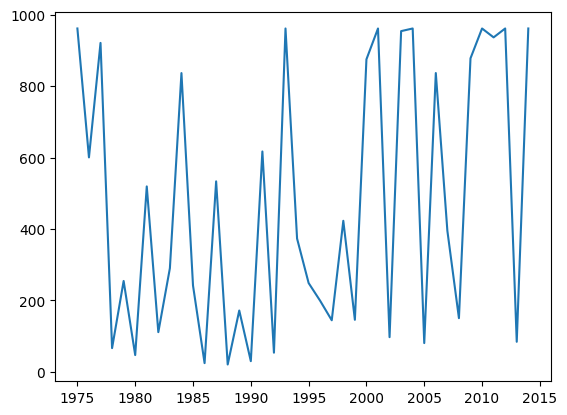

In [31]:
from matplotlib import pyplot as plt
plt.plot(AMS.index[24:],AMS_without_null['G9070142'])

# Time series plot of a non stationary time series from a gauging stations

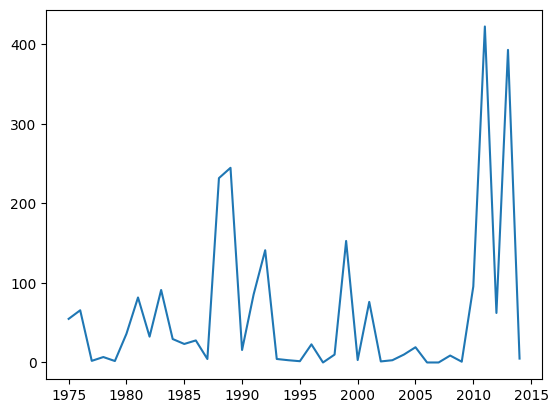

In [32]:
plt.plot(AMS.index[24:],AMS_without_null['138010A'])

# Time series plot of all non-stationary stations

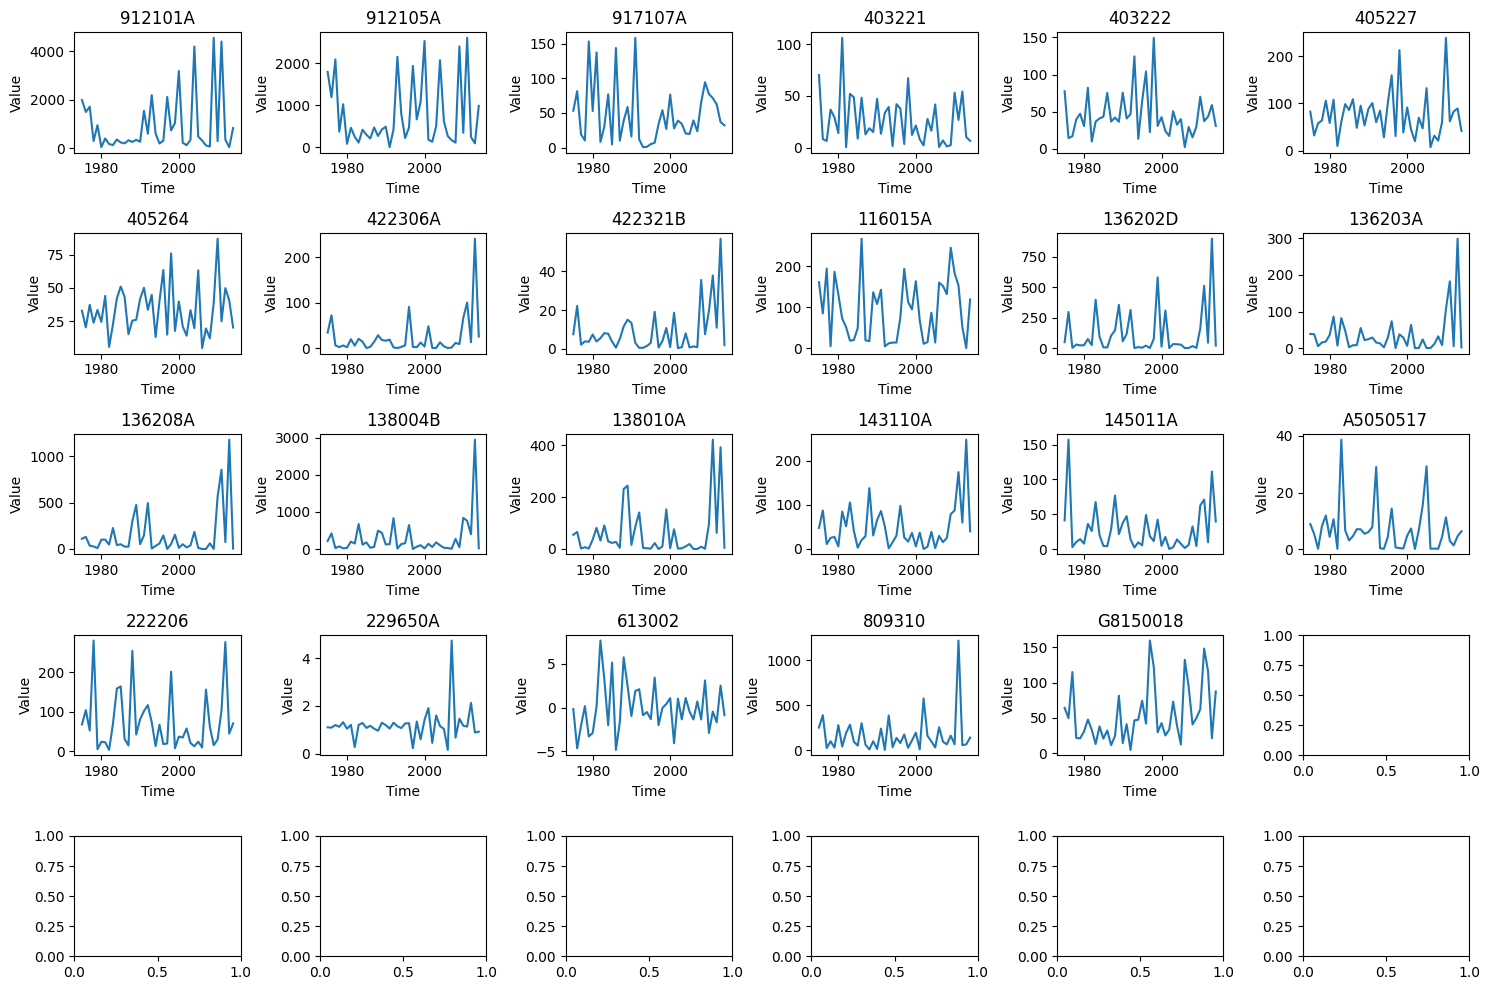

In [33]:
import matplotlib.pyplot as plt


num_rows = 5
num_cols = 6

# subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(non_stationary_stations):
    ax = axes[i]
    ax.plot(AMS_without_null.index, AMS_without_null[col])
    ax.set_title(col)
    ax.set_xlabel('Time')  # Adjust if your index represents something else
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()


# Dropping off all the non-stationary stations

In [34]:
AMS_without_null.drop(columns = non_stationary_stations, inplace=True)

In [35]:
AMS_nonull_stationary = AMS_without_null
AMS_nonull_stationary.head()

,915011A,919003A,919201A,919309A,922101B,925001A,926002A,G9030124,G9030250,G9070142,...,304499,305202,307473,308145,308799,312061,314207,314213,315450,318076
1975,82.780489,474.874276,174.983834,711.426002,140.727109,796.445134,96.162232,20.463312,739.141103,961.993843,...,105.706499,10.947117,541.483803,702.487402,138.861322,45.200637,204.064666,88.438439,318.613702,69.022938
1976,63.181077,1163.464776,333.626337,557.296202,186.380752,803.262220,111.527180,27.847303,4291.129944,600.857266,...,22.691637,5.454757,400.551835,567.257944,144.547779,27.681073,95.652281,72.701618,141.405345,27.574476
1977,34.213670,2787.459012,205.827386,1824.826284,60.288619,688.102078,36.768862,15.138561,2445.424164,921.572806,...,24.233873,4.964413,282.017871,336.861270,146.540949,15.218421,109.417702,62.479461,110.996628,42.028782
1978,5.595450,494.906555,159.698052,349.679475,75.358314,284.095404,65.612775,29.770990,611.380346,66.542630,...,16.011819,3.990414,441.044631,287.486586,136.151061,13.626996,107.551048,75.293037,90.595832,45.791142
1979,63.547278,7450.901388,578.469677,1503.196398,434.815504,973.868767,210.687309,10.329841,307.134608,254.626843,...,21.015838,1.491287,398.660643,381.880658,146.897457,17.976505,174.094951,98.649600,114.492670,36.450924


# Column names of all the stations with stationary time series

In [36]:
column_names_array_stationary = AMS_nonull_stationary.columns[:].tolist()

In [37]:
len(column_names_array_stationary)

196

In [ ]:
# for item in column_names_array_stationary:
#   print(f"'{item}',")

'915011A',
'919003A',
'919201A',
'919309A',
'922101B',
'925001A',
'926002A',
'G9030124',
'G9030250',
'G9070142',
'A0020101',
'A0030501',
'G0010005',
'G0050115',
'G0060005',
'401009',
'401012',
'401015',
'401203',
'401208',
'401210',
'401212',
'401216',
'401217',
'402204',
'402206',
'402213',
'402217',
'403209A',
'403213A',
'403214',
'403217',
'403226',
'403232',
'404207',
'405205',
'405209',
'405215',
'405217',
'405218',
'405219',
'405226',
'405238',
'405245',
'405248',
'405251',
'405263',
'405274',
'406208',
'406213',
'406214',
'406224',
'407214',
'407215',
'407220',
'407230',
'407253',
'408200',
'408202',
'410057',
'410061',
'410705',
'410730',
'410731',
'410734',
'410761',
'412028',
'412050',
'412066',
'415207',
'415226',
'415237',
'416003',
'416008',
'418005',
'418014',
'419005',
'422202B',
'422313B',
'422319B',
'422334A',
'422394A',
'424002',
'424201A',
'102101A',
'104001A',
'105101A',
'105102A',
'105105A',
'107001B',
'108002A',
'108003A',
'112002A',
'112102A',
'113004A',
'116006B

In [38]:
AMS_nonull_stationary.shape

(40, 196)

In [83]:
station_307473 = AMS_nonull_stationary['919003A']
station_307473 = pd.DataFrame(station_307473)

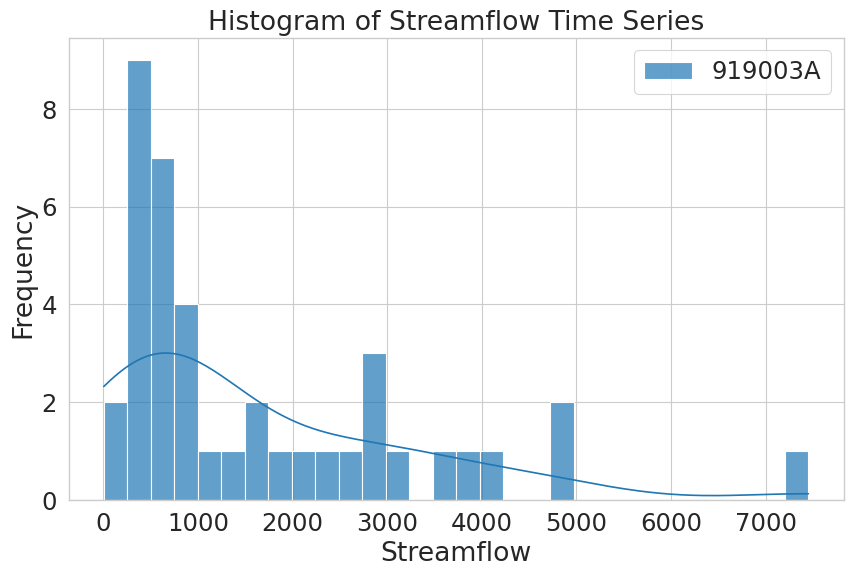

In [84]:
import seaborn as sns
sns.set_style('whitegrid')

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(station_307473, bins=30, kde=True, color='blue', alpha=0.7)


plt.xlabel('Streamflow')
plt.ylabel('Frequency')
plt.title('Histogram of Streamflow Time Series')

# Show plot
plt.show()


In [85]:
# !pip install fitter

In [86]:
from fitter import Fitter, get_common_distributions, get_distributions

2024-05-10 11:01:35.402 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gumbel_r distribution with error=6e-06)
2024-05-10 11:01:35.962 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted pearson3 distribution with error=5e-06)
2024-05-10 11:01:36.076 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted genextreme distribution with error=9e-06)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
pearson3,0.000005,1932.908132,1937.974771,inf,0.132240,4.480503e-01
gumbel_r,0.000006,1999.251663,2002.629422,inf,0.219591,3.568289e-02
genextreme,0.000009,2258.581251,2263.647889,inf,0.608472,9.697989e-15


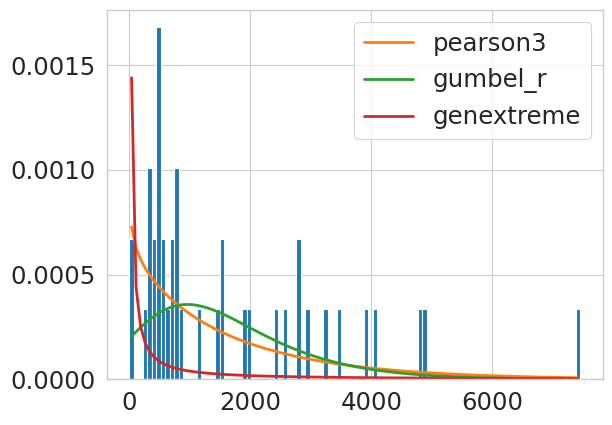

In [95]:
f = Fitter(station_307473,
           distributions=['genextreme',
                          "gumbel_r",
                          "pearson3"])
f.fit()
f.summary()

In [96]:
f.get_best(method = 'sumsquare_error')


{'pearson3': {'skew': 2.107669275206771,
  'loc': 1679.646080858806,
  'scale': 1765.9751219534064}}

Shape parameter (s): 0.9448015051302243
Location parameter: -124.7989573513815
Scale parameter: 1169.305926008575
KS Statistic (Log-Pearson Type III): 0.12497396156468654
P-value (Log-Pearson Type III): 0.5194851383851997


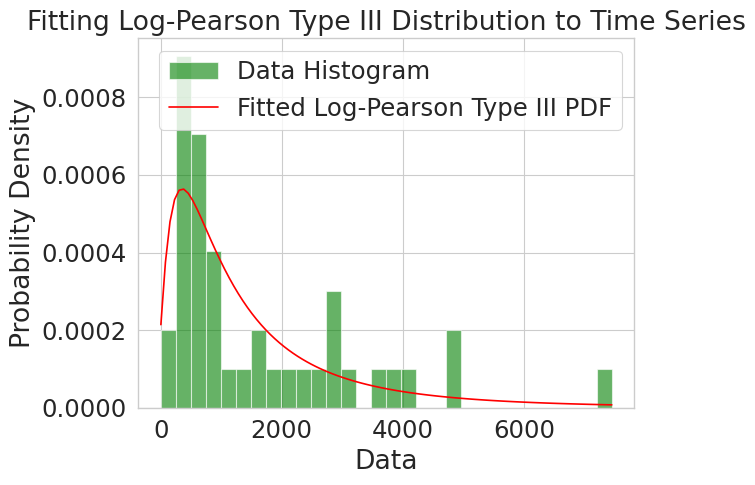

In [90]:
import numpy as np
from scipy.stats import lognorm,  kstest
import matplotlib.pyplot as plt

# Example time series data (replace this with your actual data)
time_series = station_307473['919003A']

# Fit Log-Pearson Type III distribution
params_logpearson3 = lognorm.fit(time_series)

# Extract parameters
s_logpearson3, loc_logpearson3, scale_logpearson3 = params_logpearson3

# Print parameters
print("Shape parameter (s):", s_logpearson3)
print("Location parameter:", loc_logpearson3)
print("Scale parameter:", scale_logpearson3)

# Perform KS test for Log-Pearson Type III
ks_statistic_lp3, p_value_lp3 = kstest(time_series, 'lognorm', args=params_logpearson3)
print("KS Statistic (Log-Pearson Type III):", ks_statistic_lp3)
print("P-value (Log-Pearson Type III):", p_value_lp3)

# Plot histogram of data and fitted Log-Pearson Type III distribution
plt.hist(time_series, bins=30, density=True, alpha=0.6, color='g', label='Data Histogram')
x = np.linspace(min(time_series), max(time_series), 100)
pdf_fitted_lp3 = lognorm.pdf(x, s_logpearson3, loc=loc_logpearson3, scale=scale_logpearson3)
plt.plot(x, pdf_fitted_lp3, 'r-', label='Fitted Log-Pearson Type III PDF')
plt.legend()
plt.xlabel('Data')
plt.ylabel('Probability Density')
plt.title('Fitting Log-Pearson Type III Distribution to Time Series')
plt.show()

In [99]:
from scipy.stats import lognorm

shape = 0.9448015051302243
loc = -124.7989573513815
scale = 1169.305926008575

return_periods = [2, 5, 10, 15, 20, 25, 30, 40, 50, 100, 500]

quantiles = []
for rp in return_periods:
    quantile = lognorm.ppf(1 - 1/rp, s= shape, loc=loc, scale=scale)
    quantiles.append(quantile)

for rp, quantile in zip(return_periods, quantiles):
    print(f"{rp}-year return period quantile: {quantile}")


2-year return period quantile: 1044.5069686571935
5-year return period quantile: 2464.9873238012924
10-year return period quantile: 3799.6352709023836
15-year return period quantile: 4704.197186253441
20-year return period quantile: 5406.7646725109935
25-year return period quantile: 5988.467154855791
30-year return period quantile: 6488.586238994373
40-year return period quantile: 7325.001663581751
50-year return period quantile: 8015.2436072926575
100-year return period quantile: 10406.45412246754
500-year return period quantile: 17613.07083377925


Location parameter: 960.5601347688438
Scale parameter: 1028.2107314127772
KS Statistic (Gumbel Right): 0.21959100897597378
P-value (Gumbel Right): 0.035682886696087546


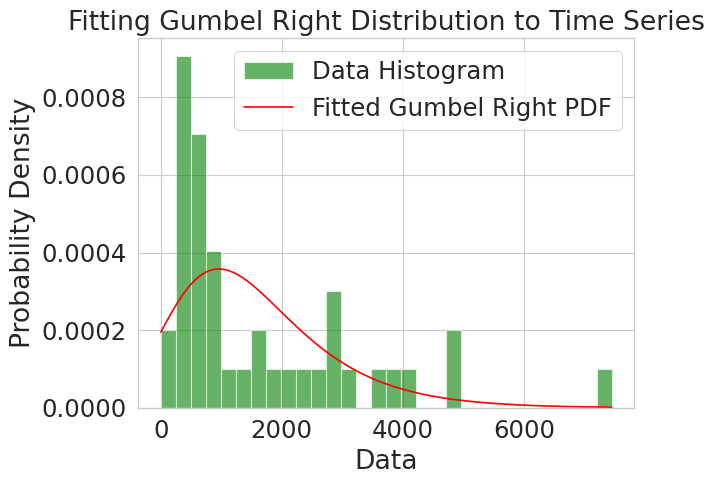

In [91]:
import numpy as np
from scipy.stats import lognorm, gumbel_r, kstest
import matplotlib.pyplot as plt

# Example time series data (replace this with your actual data)
time_series = station_307473['919003A']

params_gumbel_r = gumbel_r.fit(time_series)

# Extract parameters
loc_gumbel_r, scale_gumbel_r = params_gumbel_r

# Print parameters
print("Location parameter:", loc_gumbel_r)
print("Scale parameter:", scale_gumbel_r)

# Perform KS test for Gumbel Right
ks_statistic_gr, p_value_gr = kstest(time_series, 'gumbel_r', args=params_gumbel_r)
print("KS Statistic (Gumbel Right):", ks_statistic_gr)
print("P-value (Gumbel Right):", p_value_gr)

# Plot histogram of data and fitted Gumbel Right distribution
plt.hist(time_series, bins=30, density=True, alpha=0.6, color='g', label='Data Histogram')
x = np.linspace(min(time_series), max(time_series), 100)
pdf_fitted_gr = gumbel_r.pdf(x, loc=loc_gumbel_r, scale=scale_gumbel_r)
plt.plot(x, pdf_fitted_gr, 'r-', label='Fitted Gumbel Right PDF')
plt.legend()
plt.xlabel('Data')
plt.ylabel('Probability Density')
plt.title('Fitting Gumbel Right Distribution to Time Series')
plt.show()

Shape parameter: -6.071807593288515
Location parameter: 5.2800059741338785
Scale parameter: 8.470555880347945
KS Statistic: 0.6084724433742805
P-value: 9.69798940043586e-15


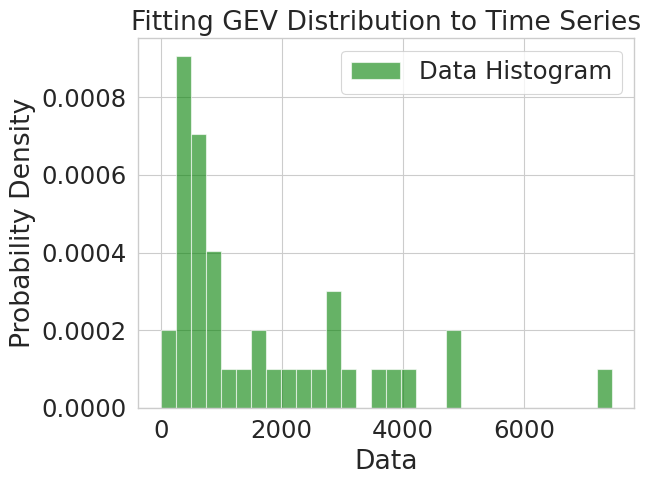

In [94]:
import numpy as np
from scipy.stats import genextreme, kstest
import matplotlib.pyplot as plt

# Example time series data (replace this with your actual data)
time_series = station_307473['919003A']

# Fit Generalized Extreme Value (GEV) distribution
params = genextreme.fit(time_series)

# Extract parameters
shape, loc, scale = params

# Print parameters
print("Shape parameter:", shape)
print("Location parameter:", loc)
print("Scale parameter:", scale)

# Perform KS test
ks_statistic, p_value = kstest(time_series, 'genextreme', args=params)
print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

# Plot histogram of data and fitted GEV distribution
plt.hist(time_series, bins=30, density=True, alpha=0.6, color='g', label='Data Histogram')
x = np.linspace(min(time_series), max(time_series), 100)
pdf_fitted = genextreme.pdf(x, shape, loc=loc, scale=scale)
# plt.plot(x, pdf_fitted, 'r-', label='Fitted GEV PDF')
plt.legend()
plt.xlabel('Data')
plt.ylabel('Probability Density')
plt.title('Fitting GEV Distribution to Time Series')
plt.show()
